In [110]:
import os
import parser as p
import numpy as np
import scipy.io as sio
from scipy import signal
from scipy.integrate import simps
import yasa
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
rootdir = "../../../data.nosync/"
filename = "Dog_1_interictal_segment_0001.mat"
path = rootdir + filename
mat = sio.loadmat(path)
data = p.get_data(mat)
channels = p.get_channels(mat)
sampling_frequency = p.get_sampling_frequency(mat)

# select all 10 mins
n = np.rint(sampling_frequency).astype(int) * (60 * 10)
t = np.arange(0, n) / sampling_frequency
X = data[0:n]
X.shape

(16, 239766)

In [32]:
channels_list = [channel.item() for channel in channels]

In [33]:
bands = [(0.1, 4, 'delta'), (4, 8, 'Theta'), (8, 12, 'Alpha'), (12, 30, 'Beta'), (30, 70, 'Low Gamma'), (70, 180, 'High Gamma')]
bands

[(0.1, 4, 'delta'),
 (4, 8, 'Theta'),
 (8, 12, 'Alpha'),
 (12, 30, 'Beta'),
 (30, 70, 'Low Gamma'),
 (70, 180, 'High Gamma')]

In [115]:
%%time
df = yasa.bandpower(X, sampling_frequency, win_sec=20, bands=bands, bandpass=True, ch_names=channels_list, relative=False)
df

CPU times: user 661 ms, sys: 150 ms, total: 812 ms
Wall time: 934 ms


,delta,Theta,Alpha,Beta,Low Gamma,High Gamma,TotalAbsPow,FreqRes,Relative
Chan,,,,,,,,,
NVC1202_32_002_Ecog_c001,282.567519,141.503069,120.188654,231.978874,86.440634,14.662503,883.638521,0.050001,False
NVC1202_32_002_Ecog_c002,191.317885,107.516560,113.232963,203.517238,81.975967,14.718527,716.951119,0.050001,False
NVC1202_32_002_Ecog_c003,103.951544,51.561883,53.070144,90.715852,38.540425,7.674681,347.548533,0.050001,False
NVC1202_32_002_Ecog_c004,130.096956,60.184757,57.340255,102.756557,44.147780,10.354291,407.187933,0.050001,False
NVC1202_32_002_Ecog_c005,1573.308545,71.554377,60.793251,114.669419,48.986433,8.025597,1880.362774,0.050001,False
NVC1202_32_002_Ecog_c006,64.768318,35.485680,34.117150,63.669218,29.913839,6.644889,235.805565,0.050001,False
NVC1202_32_002_Ecog_c007,57.187591,31.244692,27.191389,46.325563,25.083629,6.456930,194.554249,0.050001,False
NVC1202_32_002_Ecog_c008,70.731553,29.668909,23.983119,46.435320,20.264536,4.901135,197.107434,0.050001,False
NVC1202_32_002_Ecog_c009,124.163929,81.677054,85.465583,165.075790,67.783519,12.999372,540.759864,0.050001,False


In [120]:
yasa.bandpower(X, sampling_frequency, win_sec=20,
               bands=bands, bandpass=True, ch_names=channels_list,
               relative=False).drop(labels=['TotalAbsPow', 'FreqRes', 'Relative'], axis=1)

,delta,Theta,Alpha,Beta,Low Gamma,High Gamma
Chan,,,,,,
NVC1202_32_002_Ecog_c001,282.567519,141.503069,120.188654,231.978874,86.440634,14.662503
NVC1202_32_002_Ecog_c002,191.317885,107.516560,113.232963,203.517238,81.975967,14.718527
NVC1202_32_002_Ecog_c003,103.951544,51.561883,53.070144,90.715852,38.540425,7.674681
NVC1202_32_002_Ecog_c004,130.096956,60.184757,57.340255,102.756557,44.147780,10.354291
NVC1202_32_002_Ecog_c005,1573.308545,71.554377,60.793251,114.669419,48.986433,8.025597
NVC1202_32_002_Ecog_c006,64.768318,35.485680,34.117150,63.669218,29.913839,6.644889
NVC1202_32_002_Ecog_c007,57.187591,31.244692,27.191389,46.325563,25.083629,6.456930
NVC1202_32_002_Ecog_c008,70.731553,29.668909,23.983119,46.435320,20.264536,4.901135
NVC1202_32_002_Ecog_c009,124.163929,81.677054,85.465583,165.075790,67.783519,12.999372


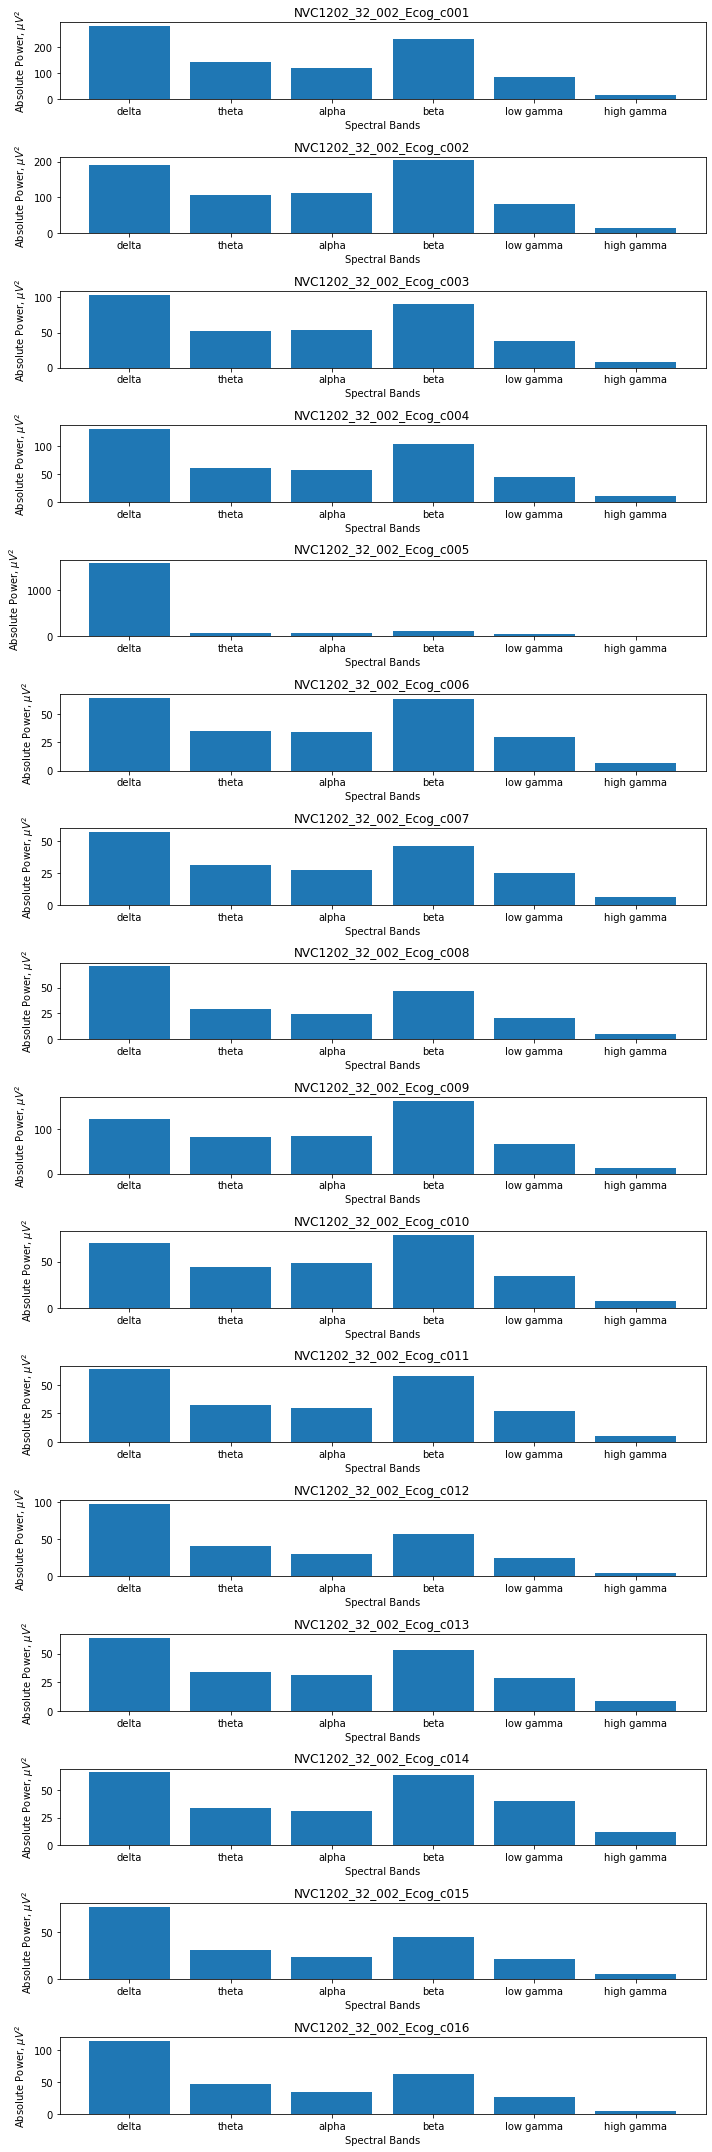

In [92]:
# visualise power bands for all channels
fig, axes = plt.subplots(figsize=(10,30), nrows=df.index.shape[0])
for i, ax in enumerate(axes):
    ax.bar(['delta', 'theta', 'alpha', 'beta', 'low gamma', 'high gamma'],
           [df['delta'][i], df['Theta'][i], df['Alpha'][i], df['Beta'][i], df['Low Gamma'][i], df['High Gamma'][i]])
    ax.set_xlabel('Spectral Bands')
    ax.set_ylabel(r'Absolute Power, $\mu V^2$')
    ax.set_title(df.index[i])
#     ax.set_yscale('log')
plt.tight_layout()